## OOP - objektově orientované programování

In [ ]:
class trida:
    class_attr = "klobasa"
    cislo = 2
    
trida.class_attr
trida.cislo

In [ ]:
instance = trida()
instance.cislo

In [ ]:
class trida:
    class_attr = 1
    
    # instance se automaticky vklada jako prvni argument pri volani metod (funkci definovanych na tride)
    def __init__(self): # konstruktor - vola pri vytvareni instance
        self.inst_attr = 2
        

instance = trida()
instance2 = trida()
print(trida.class_attr)
# print(trida.inst_attr)
print(instance.inst_attr)

trida.class_attr = 3
instance.inst_attr = True

print(instance.class_attr, instance2.class_attr)
print(instance.inst_attr, instance2.inst_attr)

In [ ]:
instance.nazev = "nazev"
instance2.nazev

In [35]:
class Animal():
    total_poke_count = 0
    
    def __init__(self, name):
        self.name = name
        self.poke_count = 0
        
    def poke(self):
        Animal.total_poke_count += 1
        self.poke_count += 1
        
    def __repr__(self):
        return "Animal:" + self.name
    
    def __str__(self):
        return self.name

zvire1 = Animal("vacice")

#zvire1.poke()
#zvire1.poke()
print(zvire1, zvire1.poke_count, Animal.total_poke_count)

vacice 0 0


In [36]:
animal_names = ["vacice", "diprotodon", "kapybara", "pes"]
animals = [Animal(name) for name in animal_names]

for i in range(10):
    for a in animals:
        a.poke()
        
print("POKE-STATS")
print("=" * 20)
for a in animals:
    print(a.name.ljust(17), a.poke_count)
print("-" * 20)
print("Total poke-count".ljust(17), Animal.total_poke_count)

POKE-STATS
vacice            10
diprotodon        10
kapybara          10
pes               10
--------------------
Total poke-count  40


## magic methods

In [41]:
class snake():
    """Toto je had."""
    
    def __init__(self, length = 2):
        self.length = length
        
    def eat(self, amount = 1):
        self.length += amount
        
    def __len__(self):
        return self.length
    
    # def __iadd__(self, other):
    def __iadd__(self, amount):
        self.length += amount
        return self
    
had = snake()
print(len(had))
print(had.__len__())

had.eat()
print(len(had))
had.eat(5)
print(len(had))

had += 10
print(len(had))

2
2
3
8
18


## Polynomy a Hornerovo schéma

Jako polynom $p(x)$ stupně (řádu) $n$ označujeme výraz
$$
p(x) = \sum\limits_{i=0}^n a_i x^i = a_0 + a_1 x + a_2 x^2 + \dots a_n x^n
$$
Přímý způsob vyčíslení polynomu je ale x praxi nežádoucí - zejména kvůli častému opakování výpočtu mocnin `x`. Místo toho se obvykle používá tzv. Hornerovo schéma zápisu polynomů
$$
p(x) = (\ldots((a_n x + a_{n-1}) \cdot x + a_{n-1}) \cdot x \ldots) \cdot x + a_0
$$

2


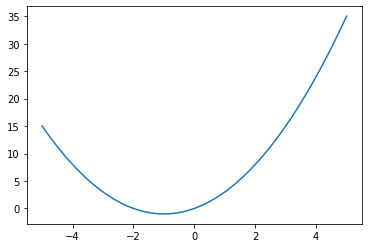

In [50]:
import numpy as np
import matplotlib.pyplot as plt

class Polynomial:
    """
    Returns a callable Polynomial object
    multiline documentation string
    Polynomial.__doc__
    """
    
    def __init__(self, *coefs):
        self.coefs = coefs
        
    # evaluates p(x)
    def __call__(self, x):
        val = self.coefs[-1]
        for c in reversed(self.coefs[:-1]):
            val = val * x + c
        return val
        
    def order(self):
        return len(self.coefs)-1
    
# parabola(x) = 1*x^2 + 2*x + 0
# parabola(4) = 1*16 + 2 * 4 = 28
parabola = Polynomial(0, 2, 1)
print(parabola.order())
parabola(4)

x = np.linspace(-5, 5, 100)
y = parabola(x)

plt.plot(x, y)
plt.show()

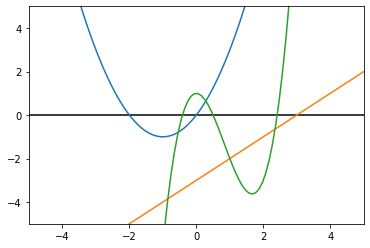

In [51]:
plt.plot(x, 0*x, color = "black")
plt.plot(x, y)
plt.plot(x, Polynomial(-3,1)(x))
plt.plot(x, Polynomial(1,0,-5,2)(x))
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()

## Iteratory a generatory

In [61]:
cisla = [1, 2, 3, 4]

for i in cisla: # iter(cisla), cisla.__iter__()
    print(i)

len(cisla) # cisla.__len__()

it = iter(cisla)
print(it, type(it))

print(next(it)) # it.__next__()
print(next(it))
print(next(it))
print(next(it))
print(next(it))

1
2
3
4
<list_iterator object at 0x7fb0129aa110> <class 'list_iterator'>
1
2
3
4


StopIteration: 

In [64]:
class Iterator:
    def __init__(self, data):
        self.data = data
        self.index = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.index == len(self.data):
            raise StopIteration
        self.index += 1
        return self.data[self.index - 1]

test = Iterator([1,2,3,5,6])

for i in test:
    print(i)

1
2
3
5
6


In [69]:
class Fibonacci:
    def __init__(self, n=10):
        self.curr = 1 # current
        self.last = 0 
        self.it = 1
        self.n = n
    
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.it > self.n:
            raise StopIteration
        self.it += 1
        
        ret = self.last
        self.last, self.curr = self.curr, self.curr + self.last
        return ret
    
for f in Fibonacci(5):
    print(f)
        
a = list(Fibonacci(150))
a[40]

0
1
1
2
3


102334155

In [71]:
def fib_gen(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a+b
        
list(fib_gen(10))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

## Vlastní implementace komplexních čísel
Komplexní čísla mají dvě složky: reálnou a imaginární. Jejich aritmetika je odvozena od definující vlastnosti imaginární jednotky $i$, tedy
\begin{align}
    i^2 &= -1\\
    (a + bi) \pm (c + di) &= (a \pm b) + (c\pm d)i\\
    (a + bi) \cdot (c + di) &= (ac - bd) + (ad + bc)i\\
    \frac{(a + bi)}{(c + di)} &= \frac{(ac + bd) + (bc - ad)i}{c^2+d^2}\\
\end{align}
Kromě toho se ještě zavádí komplexně sdružené číslo a absolutní hodnota komplexního čísla:
\begin{align}
    (a + bi)^* &= a - bi\\
    |a+bi| &= \sqrt{a^2 + b^2}
\end{align}

In [96]:
from math import sqrt
class Complex:
    
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
    
    def abs(self):
        return sqrt(self.real**2 + self.imag**2)
    
    # komplexne sdruzene: complex conjugate
    def conj(self):
        return Complex(self.real, -self.imag)
    
    def __str__(self):
        return "{:.5f}{:+.5f}i".format(self.real, self.imag)
    
    def __repr__(self):
        return str(self)
    
    # + ~ __add__(self, other)
    def __add__(self, other):
        return Complex(self.real + other.real, self.imag + other.imag)
    
    def __radd__(self, other):
        return Complex(self.real + other.real, self.imag + other.imag)
    
    # __sub__, __rsub__, __mul__, __rmul__, __truediv__
    
    def __eq__(self, other):
        return (self.real == other.real) and (self.imag == other.imag)
    
    def __neq__(self, other):
        return not self == other
    
a = Complex(1, 1)
b = a.conj()
print(a, b)
c = b + a
print(c)
d = 1 + a # __radd__
print(d)
# a = b + c
a != b
"ahoj" + " neco"

1.00000+1.00000i 1.00000-1.00000i
2.00000+0.00000i
2.00000+1.00000i


'ahoj neco'